improt labraries
-

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()

import numpy as np 
import pandas as pd 

Reading Data
-

In [3]:
data = pd.read_csv("boston.csv")

Handling Missing Values
Imputation: Filling missing values with mean.
- 

In [ ]:
data.isnull().sum()

In [4]:
import pandas as pd
import numpy as np

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

numeric_cols.fillna(numeric_cols.mean(), inplace=True)   

data = pd.concat([numeric_cols, non_numeric_cols], axis=1)

missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


In [5]:
data.shape

(506, 15)

Removal: Deleting rows with missing values.
-

In [6]:
data.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [7]:
data.shape

(506, 15)

In [8]:
data.dropna(inplace=True)
missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


In [9]:
data.shape

(506, 15)

Outlier Detection and Removal
-

In [11]:
data.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


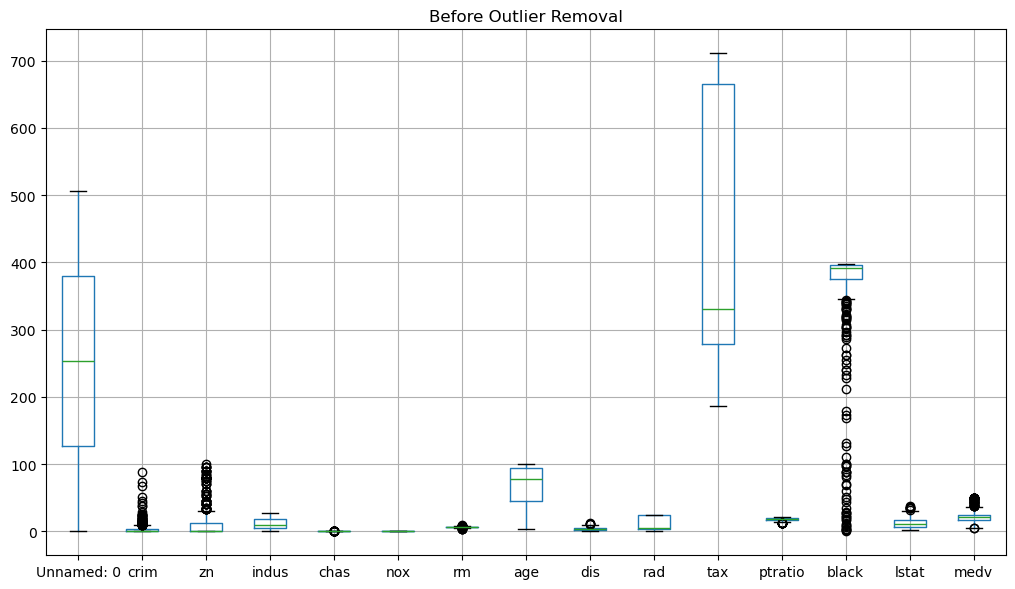

In [12]:
numeric_cols = data.select_dtypes(include=[np.number])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")
plt.tight_layout()
plt.show()


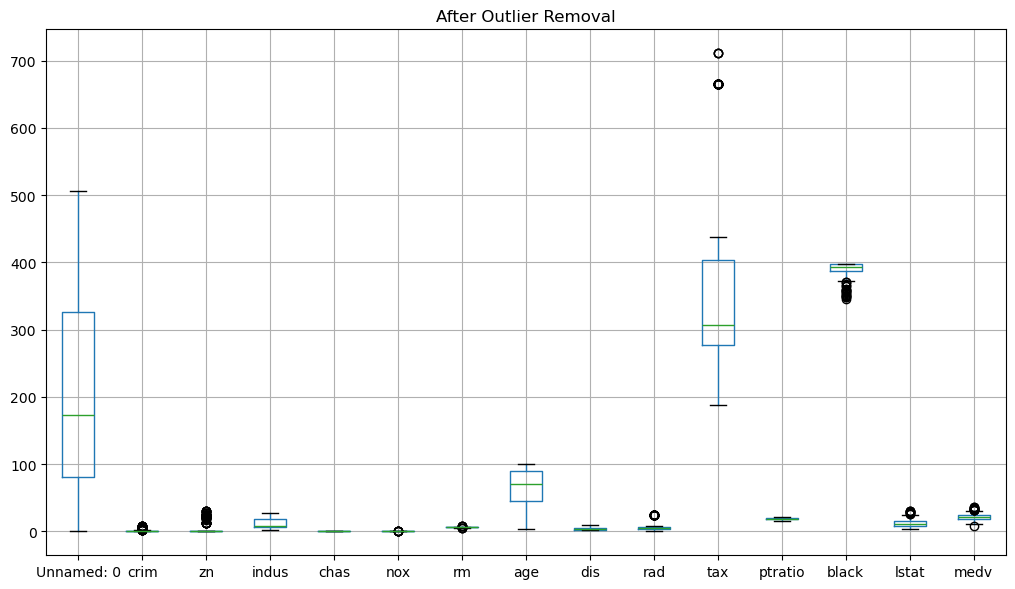

In [13]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


In [14]:
data_cleaned.shape

(268, 15)

Data Normalization
- 

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)
print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()


(506, 15)

************************************************************


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.001980,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.003960,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.005941,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.007921,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


Data standardization
- 

In [18]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)
print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()


(506, 15)

************************************************************


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-1.728631,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-1.721785,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-1.714939,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-1.708093,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-1.701247,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


Splitting Data
- 

In [20]:
from sklearn.model_selection import train_test_split
X = data.drop('tax', axis=1)
y = data['tax']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 14), (152, 14), (354,), (152,))